<a href="https://www.kaggle.com/code/ahmedanwar89/medical-cost-personal-eda?scriptVersionId=147799915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import dataset

In [2]:
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
771,53,female,26.700,2,no,southwest,11150.78000
199,64,female,39.330,0,no,northeast,14901.51670
56,58,female,31.825,2,no,northeast,13607.36875
1192,58,female,32.395,1,no,northeast,13019.16105
1131,27,male,45.900,2,no,southwest,3693.42800


# data cleaning

In [4]:
# check data type

insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# check null values

insurance.isnull().any(), insurance.isnull().sum()

(age         False
 sex         False
 bmi         False
 children    False
 smoker      False
 region      False
 charges     False
 dtype: bool,
 age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64)

In [6]:
# check duplicated values

insurance.duplicated().any(), insurance.duplicated().sum()

(True, 1)

In [7]:
# drop duplicated values.

insurance.drop_duplicates(inplace= True)

In [8]:
# check duplicated values again

insurance.duplicated().any(), insurance.duplicated().sum()

(False, 0)

In [9]:
# check data validity

insurance.select_dtypes(include= 'object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [10]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
insurance.describe().round(2)

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


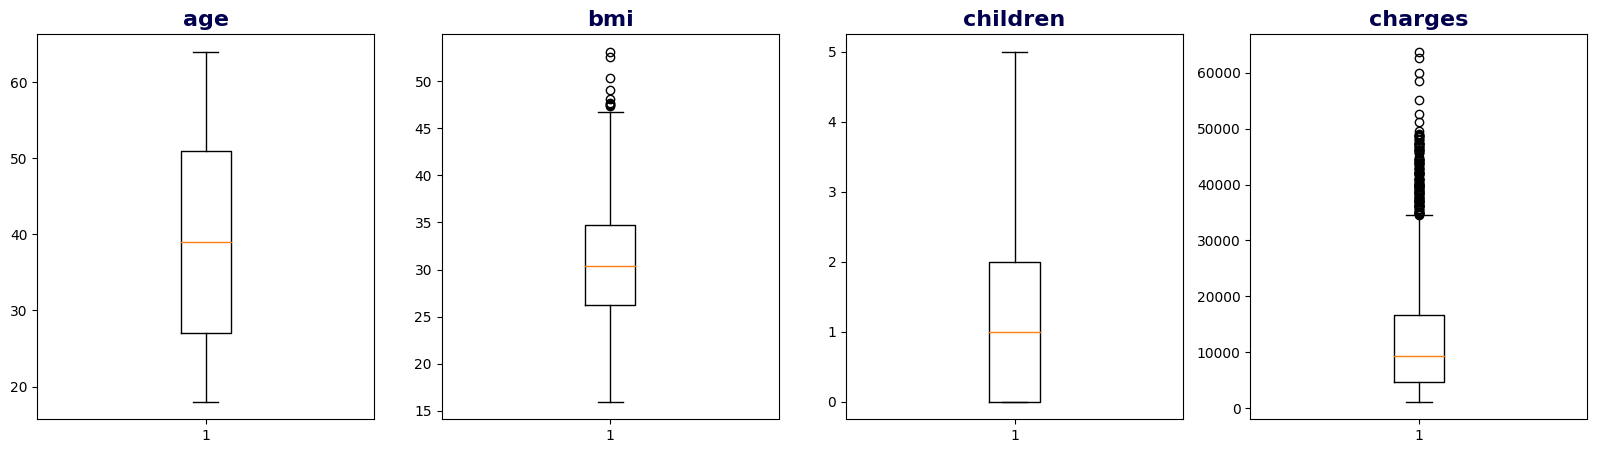

In [14]:
# check outliers

fig, ax = plt.subplots(nrows= 1,\
                       ncols= len(insurance.select_dtypes(exclude= 'object').columns),\
                       sharey= False,\
                       figsize= (20, 5))

for i in np.arange(0, len(insurance.select_dtypes(exclude= 'object').columns), 1) :
    
    ax[i].boxplot(data= insurance.select_dtypes(exclude= 'object'),\
                  x= insurance.select_dtypes(exclude= 'object').columns[i])
    ax[i].set_title(insurance.select_dtypes(exclude= 'object').columns[i],\
                    fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})

plt.show()

In [15]:
# drop outlier points from 'bmi'.

insurance = insurance[insurance['bmi'] <= 50]

In [16]:
# drop outlier points from 'charges'.

insurance = insurance[insurance['charges'] <= 55000]

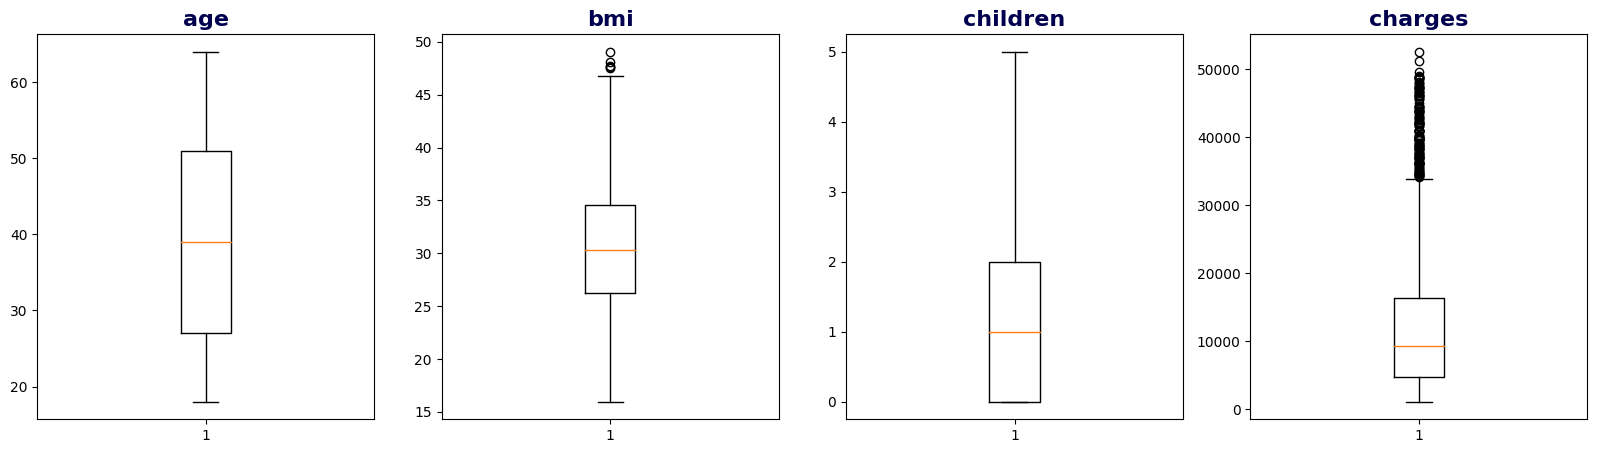

In [17]:
# check outliers again

fig, ax = plt.subplots(nrows= 1,\
                       ncols= len(insurance.select_dtypes(exclude= 'object').columns),\
                       sharey= False,\
                       figsize= (20, 5))

for i in np.arange(0, len(insurance.select_dtypes(exclude= 'object').columns), 1) :
    
    ax[i].boxplot(data= insurance.select_dtypes(exclude= 'object'),\
                  x= insurance.select_dtypes(exclude= 'object').columns[i])
    ax[i].set_title(insurance.select_dtypes(exclude= 'object').columns[i],\
                    fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})

plt.show()

In [18]:
# check

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


In [19]:
# reset index

insurance.reset_index(drop= True,inplace= True)

In [20]:
# last check

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.8+ KB


# data analysis

In [21]:
px.imshow(insurance.select_dtypes(exclude= 'object').corr(numeric_only= True),\
         text_auto= True,\
         aspect= True,\
         color_continuous_scale= 'Blues',\
         title= 'correlation coefficient')

# **what is the most common age with insurance?**

In [22]:
insurance['age'].value_counts().head(10)

age
18    68
19    67
50    29
51    29
47    29
46    29
20    29
48    29
52    28
49    28
Name: count, dtype: int64

In [23]:
px.bar(insurance['age'].value_counts())

# **what is the most common gender with insurance?**

In [24]:
insurance['sex'].value_counts()

sex
male      670
female    659
Name: count, dtype: int64

In [25]:
px.bar(insurance['sex'].value_counts(),\
      color= insurance['sex'].value_counts().index,\
      title= 'the most common gender with insurance')

# **what is the count of insurance regarding to smoker status or not?**

In [26]:
insurance['smoker'].value_counts()

smoker
no     1061
yes     268
Name: count, dtype: int64

In [27]:
px.bar(insurance['smoker'].value_counts(),\
      color= insurance['smoker'].value_counts().index,\
      title= 'the count of insurance regarding to smoker status or not')

# **what is the count of insurance for each region**

In [28]:
insurance['region'].value_counts()

region
southeast    359
southwest    325
northeast    323
northwest    322
Name: count, dtype: int64

In [29]:
px.bar(insurance['region'].value_counts(),\
      color= insurance['region'].value_counts().index,\
      title= 'the count of insurance for each region')

# **what is the sum of charges regarding to gender**

In [30]:
insurance.groupby('sex').agg({'charges': 'sum'})

,charges
sex,
female,8.143584e+06
male,9.262407e+06


In [31]:
px.bar(insurance.groupby('sex').agg({'charges': 'sum'}),\
      color= insurance.groupby('sex').agg({'charges': 'sum'}).index,\
      title= 'sum of charges regarding to gender')

# **what is the sum of charges for each gender regarding to age?**

In [32]:
insurance.pivot_table(index= 'age', columns= 'sex', values= 'charges', aggfunc= 'sum').sample(5)

sex,female,male
age,,
25,103921.90937,171552.31933
20,102926.84600,191704.38835
55,209085.05327,211193.12943
53,243616.91427,204969.14687
31,55102.38880,161645.01220


In [33]:
px.bar(insurance.pivot_table(index= 'age', columns= 'sex', values= 'charges', aggfunc= 'sum'),\
      facet_col= 'sex',\
      title= 'sum of charges for each gender regarding to age')

# **what is the sum of charges for each age regarding to num of children that person has?**

In [34]:
insurance.pivot_table(index= 'age', columns= 'children', values= 'charges', aggfunc= 'sum').head(10).round(2)

children,0,1,2,3,4,5
age,,,,,,
18,352528.29,41475.47,67515.29,21705.32,4561.19,NaN
19,508929.19,40094.40,88668.18,18838.70,NaN,4687.80
20,134775.76,68677.02,43967.42,37465.34,NaN,9745.69
21,45700.74,25812.69,39136.25,3861.21,17942.11,NaN
22,104662.69,42447.48,41410.21,47340.35,NaN,NaN
23,115403.39,67213.64,114855.07,47844.80,NaN,NaN
24,256015.42,12609.89,3537.70,8853.01,17128.43,NaN
25,92316.39,34796.47,105667.40,28231.24,9382.64,5080.10
26,42885.85,29091.71,70436.59,4661.29,24671.66,NaN


In [35]:
px.scatter(data_frame= insurance,\
          x= 'age',\
          y= 'charges',\
          size= 'children',\
          color= 'sex',\
          facet_col= 'sex',\
          title= 'relationship between age and charges regarding to num of children status')